Text(0, 0.5, '$\\mathrm{Im}(z)$')

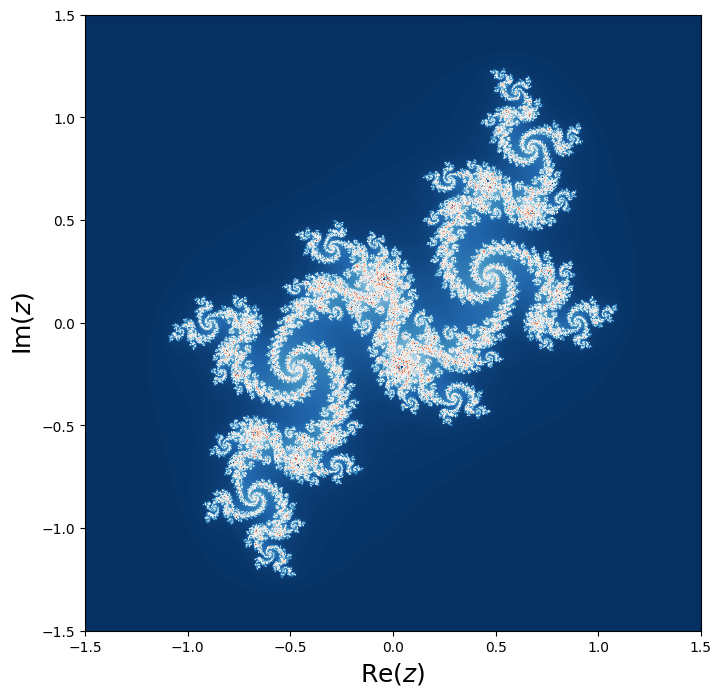

In [26]:
import numba
import numpy as np
import matplotlib.pyplot as plt

def py_julia_fractal(z_re, z_im, j):
    for m in range(len(z_re)):
        for n in range(len(z_im)):
            z = z_re[m] + 1j * z_im[n]
            for t in range(256):
                z = z ** 2 - 0.05 + 0.68j
                if np.abs(z) > 2.0:
                    j[m, n] = t
                    break
            
jit_julia_fractal = numba.jit(nopython=True)(py_julia_fractal)

N = 1024
j = np.zeros((N,N)) #np.int(64)
z_real = np.linspace(-1.5, 1.5, N)
z_imag = np.linspace(-1.5, 1.5, N)
jit_julia_fractal(z_real, z_imag, j)

fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(j, cmap = plt.cm.RdBu_r, extent=[-1.5, 1.5, -1.5, 1.5])
ax.set_xlabel("$\mathrm{Re}(z)$", fontsize=18)
ax.set_ylabel("$\mathrm{Im}(z)$", fontsize=18)